In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ROM

In [27]:
# Define a few aesthetic colours using Hex codes
myblue   = '#0F56B5'
myred    = '#EF4647'
mygrey   = '#666666'
mygreen  = '#2CA02C'
mypurple = '#9467bd'

rc_params = {
    # 'backend': 'pdf',
    'axes.labelsize': 24,
    'axes.titlesize': 32,
    'font.size': 24,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'serif',
    'font.sans-serif': ['Bitstream Vera Sans'],
    'font.serif': ['Times New Roman'],
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex':True,
    'axes.linewidth':1.75,
    'patch.force_edgecolor':True
}
plt.rcParams.update(rc_params);

--- 0.001499176025390625 seconds ---


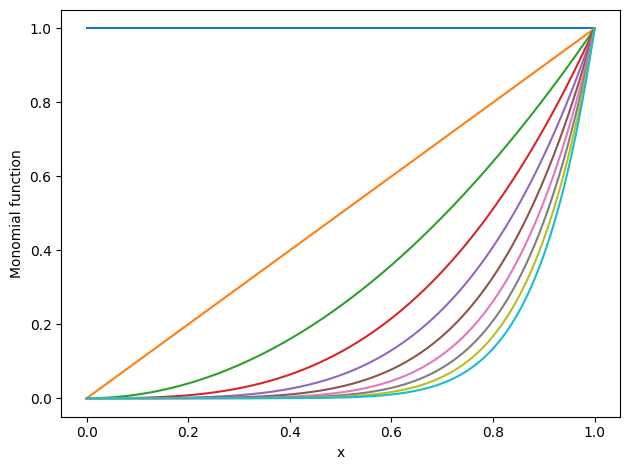

In [3]:
x = np.linspace(0, 1, 1000)
def monomial(n, x):
    y = []
    params = np.arange(0, n, 1)

    for i in params:
        y.append(x**i)

    return np.asarray(y)

import time
start_time = time.time()
y = monomial(10, x)
print("--- %s seconds ---" % (time.time() - start_time))

for j in y:
    plt.plot(x, j)
plt.xlabel('x')
plt.ylabel('Monomial function')
plt.tight_layout()
plt.savefig('figures/monomials', dpi=300)
plt.show()

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# for order in range(5):
#    # Attempt to generate legendre polynomials with numpy
#    x, L = np.polynomial.legendre.Legendre.basis(order, [-1, 1]).linspace(100)
#    plt.plot(x, L, label=order)

# plt.legend()
# plt.plot()
# plt.show()

# y = monomial(10, x)

# RB = ROM.modified_GS(y, x)
# RB = RB[:5, :]
# for j in RB:
#    plt.plot(x, j)
# plt.show()

# for k in range(len(RB)):
#    print(RB[k]/L[k])


In [4]:
def modified_GS(input_funcs, x, error=1e-8, verbose=False, pool=None, rel_error=True):
    """Performs a Gram-Schmidt algorithm on a set of input functions

    Args:
        input_funcs (array): array of input functions to be orthonormalised
        error (float): the desired level of accuracy when performing a Gram-Schmidt algorithm
        x (array): domain of the input functions
        verbose (bool, optional): If TRUE:. Defaults to False.

    Returns:
        array: array of orthonormalised basis functions
    """    
    verboseprint = print if verbose else lambda *a: None
    
    functions    = np.copy(input_funcs)
    greedy_error = error

    # We select the first (arbitrary) function and normalise it. This is our first basis vector in the reduced basis
    RB = [get_normalized(functions[0], x)]

    vectors = functions
    for j in range(len(vectors)):
        vectors[j] -= get_projection(RB[0], vectors[j], x)

    k                 = 0
    potential_gerror  = get_greedy_errors(RB, functions, x, pool=pool)
    greedy_error      = np.max(potential_gerror)
    if rel_error:
        greedy_error_init = greedy_error
    else:
        greedy_error_init = 1.0
    greedy_error /= greedy_error_init
    verboseprint("Iteration {k} : {err}".format(k=k, err=greedy_error))

    while greedy_error > error:    
        # Do Gram-Schmidt orthonormalisation
        new_BV = vectors[np.argmax(potential_gerror)]
        RB.append(get_normalized(new_BV, x))
        k     += 1

        # Regenerate vectors
        for j in range(len(vectors)):
            vectors[j] -= get_projection(RB[k], vectors[j], x)
        
        potential_gerror = get_greedy_errors(RB, functions, x, pool=pool)
        greedy_error     = np.max(potential_gerror) / greedy_error_init
        
        verboseprint("Iteration {k} : {err}".format(k=k, err=greedy_error))

    return np.asarray(RB), np.asarray(errors), 


1.0
5.99563801384484e-17
0.0
7.255480938272996e-16
9.82287168271867e-16
-1.9276897786357772e-14
-1.0526388788401064e-13
7.827831265128093e-13
-7.337793567208095e-14
5.99563801384484e-17
1.0000000000000002
8.066464163292153e-17
9.124645483638005e-16
2.6211671722009555e-15
2.5444056583889818e-14
6.65452935810773e-14
-1.3595895242968226e-12
4.048292083502769e-12
0.0
8.066464163292153e-17
1.0
6.852157730108388e-17
5.724587470723463e-16
3.0444397003392965e-16
6.942363350859182e-15
-3.271627760370599e-13
-2.7320160023158735e-14
7.255480938272996e-16
9.124645483638005e-16
6.852157730108388e-17
0.9999999999999999
3.0184188481996443e-16
-8.81239525796218e-16
-5.208073555751369e-15
-1.3079641536517528e-13
4.540916254125449e-13
9.82287168271867e-16
2.6211671722009555e-15
5.724587470723463e-16
3.0184188481996443e-16
0.9999999999999998
7.402932433731024e-16
9.072603779358701e-16
-2.1350976542322542e-14
1.0844276865373814e-13
-1.9276897786357772e-14
2.5444056583889818e-14
3.0444397003392965e-16
-8.8

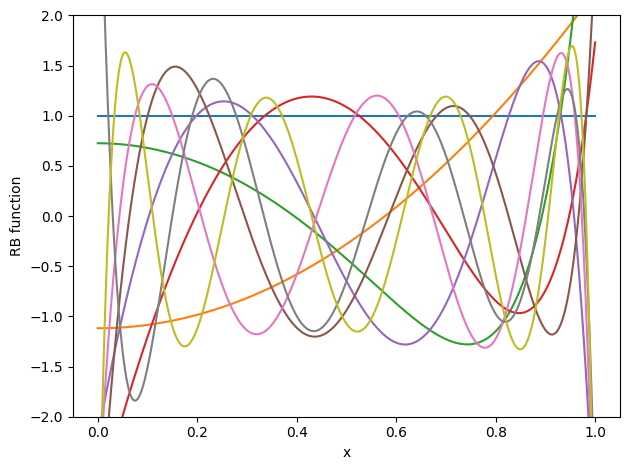

In [5]:
# RB, sigmas = ROM.modified_GS(y, x)
RB = ROM.modified_GS(y, x)

# plt.loglog(sigmas)
# plt.xlabel('Iterations')
# plt.ylabel('Error')
# plt.tight_layout()
# plt.savefig('figures/errors_monomial', dpi=300)
# plt.show()
# plt.show()

# Orth test
for i in RB:
    for j in RB:
        print(ROM.get_inner(i, j, x))

print(len(RB))

for k in RB:
    plt.plot(x, k)
plt.ylim(-2, 2)
plt.xlabel('x')
plt.ylabel('RB function')
plt.tight_layout()
plt.savefig('figures/legendre_polys', dpi=300)
plt.show()

In [8]:
RB.shape

(8, 1000)

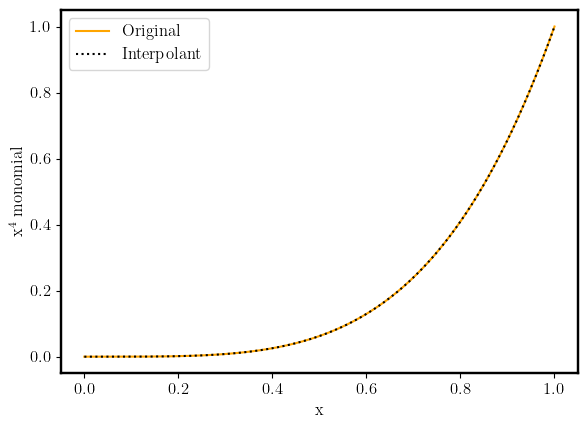

6.400071032788531e-17


In [9]:
nodes, B = ROM.empirical_interpolation(RB)

test_number = 4

z = np.dot(B, y[test_number, nodes])

plt.plot(x, y[test_number], label='Original', color='#FFA500')
# plt.plot(x, z, label='Interpolant', linestyle=(0, (5, 10)), color=myred)
plt.plot(x, z, label='Interpolant', linestyle='dotted', color='#000000')
plt.xlabel('x')
plt.ylabel('x$^4$ monomial')
plt.legend()
plt.tight_layout()
plt.savefig('figures/x4_EI', dpi=300)
plt.show()

print(ROM.get_norm(y[test_number]-z, x))

errors = []
for i in range(len(y)):
    z = np.dot(B, y[i, nodes])
    error = ROM.get_norm(y[i]-z, x)
    errors.append(error)

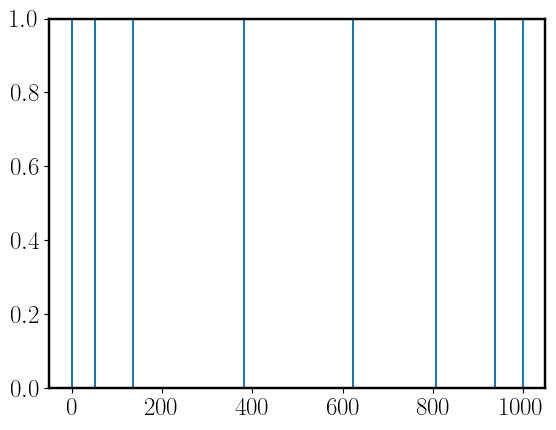

In [10]:
for i in nodes:
    plt.axvline(x=i)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

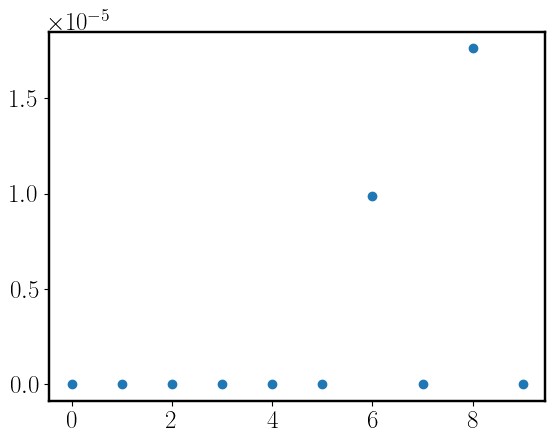

In [11]:
plt.scatter(np.arange(0, 10, 1), errors)
plt.plot

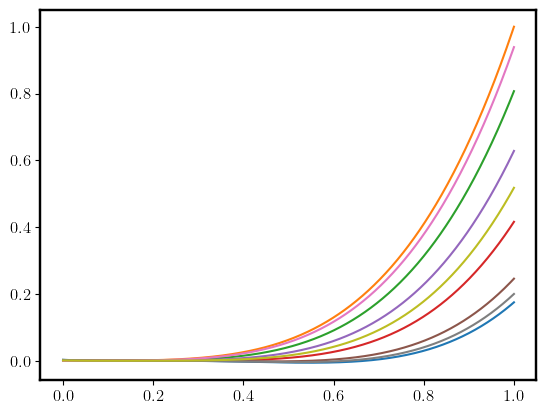

0.004017415972566263


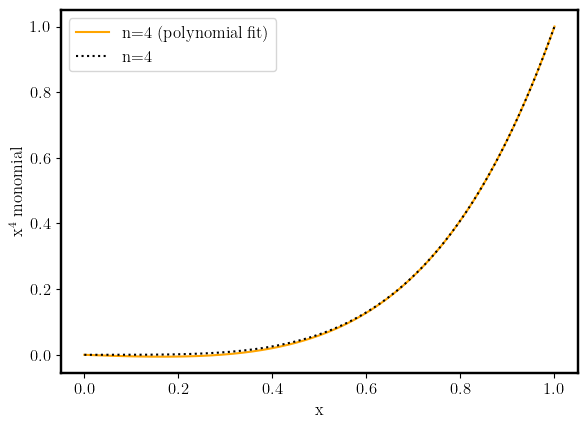

In [8]:
x = np.linspace(0, 1, 1000)
y = monomial(10, x)
RB = ROM.modified_GS(y, x)
nodes, B = ROM.empirical_interpolation(RB)
params = np.arange(0, 10, 1)

p = ROM.get_polyfit(params, y, nodes, order=4)
f_p = []
start_time = time.time()
for k in range(len(nodes)):
    f_p.append(ROM.fit_waveform(4, p[k]))
ff = np.dot(B, f_p)

for i in p:
    fit = i[0] + i[1]*x + i[2]*x**2 + i[3]*x**3 + i[4]*x**4
    plt.plot(x, fit)
plt.show()


plt.plot(x, ff, label='n=4 (polynomial fit)', color='#FFA500')
plt.plot(x, x**(4), label = 'n=4', linestyle='dotted', color='#000000')
plt.legend()
plt.xlabel('x')
plt.ylabel('x$^{4}$ monomial')
plt.legend()
plt.tight_layout()
plt.savefig('figures/polyfit', dpi=300)

print(ROM.get_norm(x**4-ff, x))

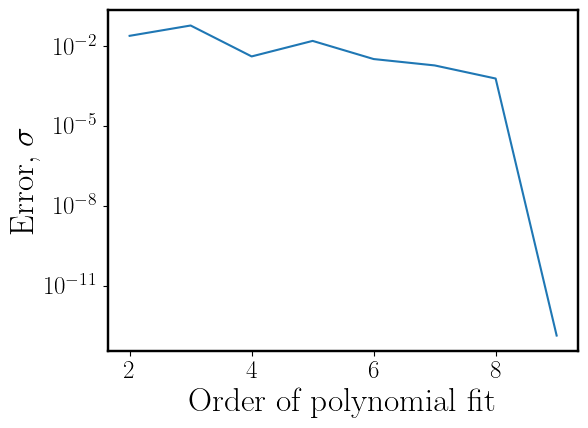

In [32]:

# Define a few aesthetic colours using Hex codes
myblue   = '#0F56B5'
myred    = '#EF4647'
mygrey   = '#666666'
mygreen  = '#2CA02C'
mypurple = '#9467bd'

rc_params = {
    # 'backend': 'pdf',
    'axes.labelsize': 24,
    'axes.titlesize': 32,
    'font.size': 24,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'serif',
    'font.sans-serif': ['Bitstream Vera Sans'],
    'font.serif': ['Times New Roman'],
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex':True,
    'axes.linewidth':1.75,
    'patch.force_edgecolor':True
}
plt.rcParams.update(rc_params);
x = np.linspace(0, 1, 1000)
y = monomial(10, x)
RB = ROM.modified_GS(y, x)
nodes, B = ROM.empirical_interpolation(RB)
params = np.arange(0, 10, 1)

fits = []
for i in range(2,10):
    p = ROM.get_polyfit(params, y, nodes, order=i)
    f_p = []
    start_time = time.time()
    for k in range(len(nodes)):
        f_p.append(ROM.fit_waveform(4, p[k]))
    ff = np.dot(B, f_p)
    fits.append(ff)

errors = []
for i in fits:
    errors.append(ROM.get_norm(x**4-i, x))

plt.semilogy(range(2,10),errors)
plt.xlabel('Order of polynomial fit')
plt.ylabel('Error, $\sigma$')
plt.tight_layout()
plt.savefig('figures/poly_error', dpi=300)
plt.show()

NameError: name 'test_number' is not defined

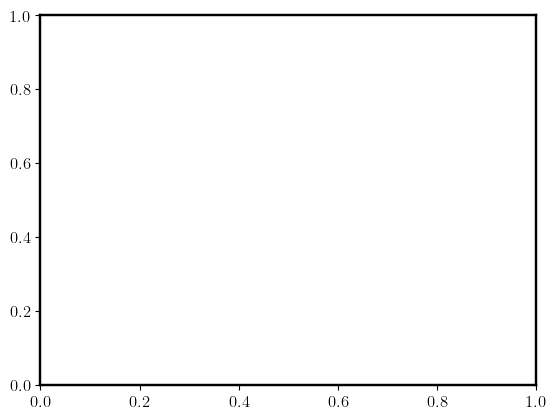

In [7]:
# Define a few aesthetic colours using Hex codes
myblue   = '#0F56B5'
myred    = '#EF4647'
mygrey   = '#666666'
mygreen  = '#2CA02C'
mypurple = '#9467bd'

rc_params = {
    # 'backend': 'pdf',
    'axes.labelsize': 12,
    'axes.titlesize': 12,
    'font.size': 24,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'font.sans-serif': ['Bitstream Vera Sans'],
    'font.serif': ['Times New Roman'],
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex':True,
    'axes.linewidth':1.75,
    'patch.force_edgecolor':True
}
plt.rcParams.update(rc_params);

nodes, B = ROM.empirical_interpolation(RB)
fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(nodes)):
    trunc_nodes = nodes[:i]
    trunc_B = B[:,:i]
    z = np.dot(trunc_B, y[test_number, trunc_nodes])
    ax.plot(x, z, label='{} reduced basis vectors used'.format(i))
ax.plot(x, y[test_number], label='Original x$^4$ function', linestyle='dotted')
plt.ylabel('Function')
plt.xlabel('x')
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [142]:
RB.shape

(8, 1000)

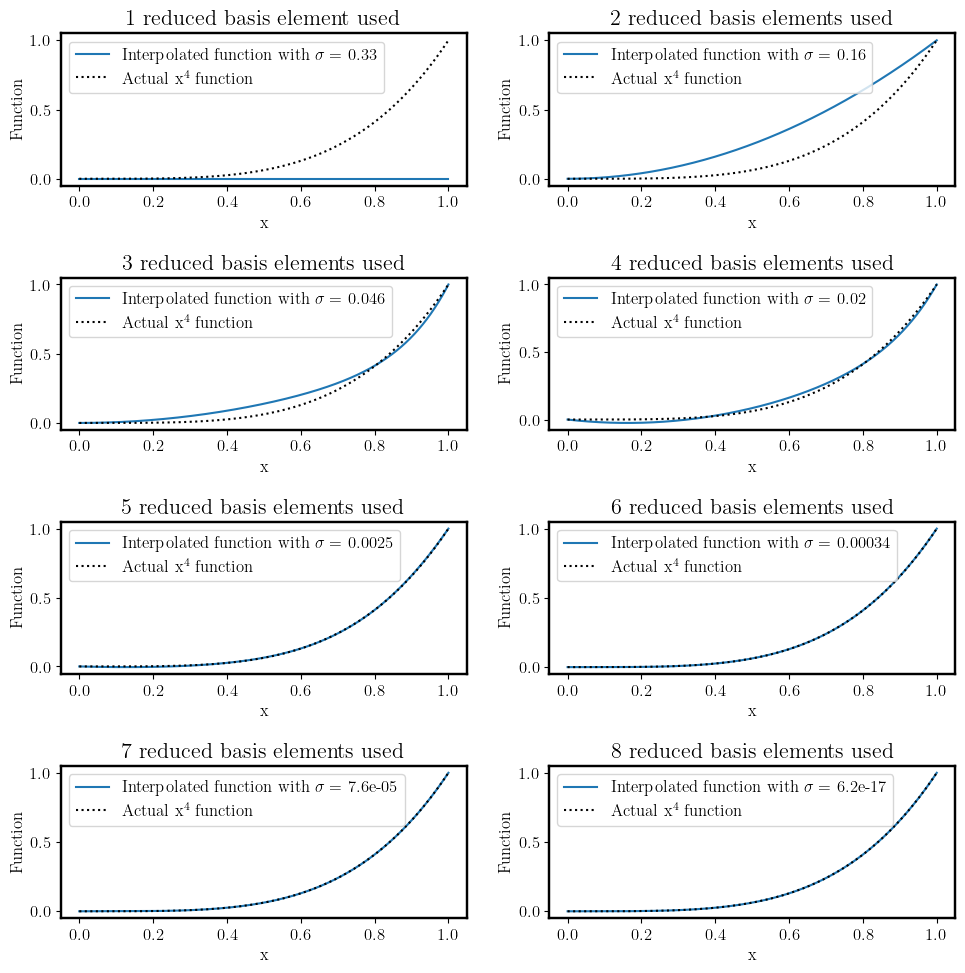

In [24]:
# Define a few aesthetic colours using Hex codes
myblue   = '#0F56B5'
myred    = '#EF4647'
mygrey   = '#666666'
mygreen  = '#2CA02C'
mypurple = '#9467bd'

rc_params = {
    # 'backend': 'pdf',
    'axes.labelsize': 12,
    'axes.titlesize': 16,
    'font.size': 24,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'font.family': 'serif',
    'font.sans-serif': ['Bitstream Vera Sans'],
    'font.serif': ['Times New Roman'],
    'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb} \usepackage{amsfonts}',
    'text.usetex':True,
    'axes.linewidth':1.75,
    'patch.force_edgecolor':True
}
plt.rcParams.update(rc_params);

nodes, B = ROM.empirical_interpolation(RB)
fig, ax = plt.subplots(4, 2, figsize=(10,10))
positions = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1)]
sigma = '\simga'
for i in range(len(RB)-1):
    if i == 0:
        sig = ROM.get_norm(y[test_number]-np.zeros(len(x)), x)
        ax[positions[i]].plot(x, np.zeros(len(x)), label=f'Interpolated function with $\sigma=$ {sig:.2}')
        ax[positions[i]].set_ylabel('Function')
        ax[positions[i]].set_xlabel('x')
        ax[positions[i]].set_title(f'{i+1} reduced basis element used')
        ax[positions[i]].plot(x, y[test_number], linestyle='dotted', color='#000000', label='Actual x$^4$ function')
        ax[positions[i]].legend()
    else:
        nodes, B = ROM.empirical_interpolation(RB[:i+1])
        z = np.dot(B, y[test_number, nodes])
        sig = ROM.get_norm(y[test_number]-z, x)
        ax[positions[i]].plot(x, z, label=f'Interpolated function with $\sigma=$ {sig:.2}')
        ax[positions[i]].set_ylabel('Function')
        ax[positions[i]].set_xlabel('x')
        ax[positions[i]].set_title(f'{i+1} reduced basis elements used')
        ax[positions[i]].plot(x, y[test_number], linestyle='dotted', color='#000000', label='Actual x$^4$ function')
        ax[positions[i]].legend()
fig.tight_layout(pad=0.7)
plt.savefig('figures/interpolant_growth', dpi=300)
plt.show()

In [124]:
def monomial(n, x):
    y = []
    params = np.arange(0, n, 1)

    for i in params:
        y.append(x**i)

    return np.asarray(y)

x = np.linspace(0, 1, 1000)
monomial(10, x)

RB = ROM.modified_GS(y, x)
nodes, B = ROM.empirical_interpolation(RB)

In [126]:
import scipy.integrate as integrate
import scipy.special as special

def match(f1, f2, x):
    I = f1*f2
    return integrate.simpson(I, x)

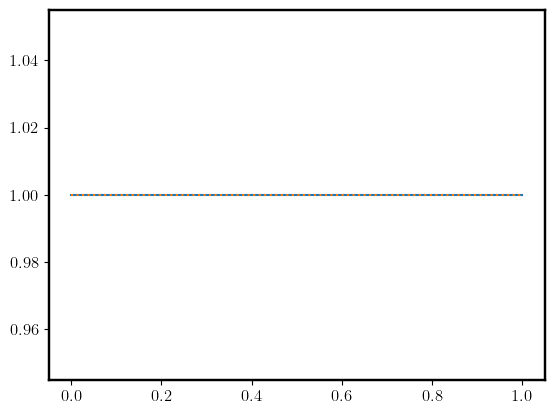

0.9999999999999999


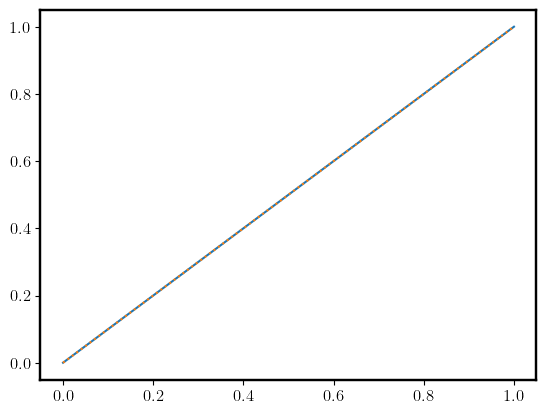

0.33333333350050093


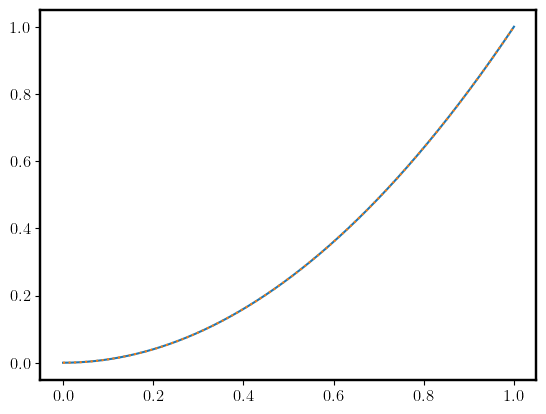

0.200000000501135


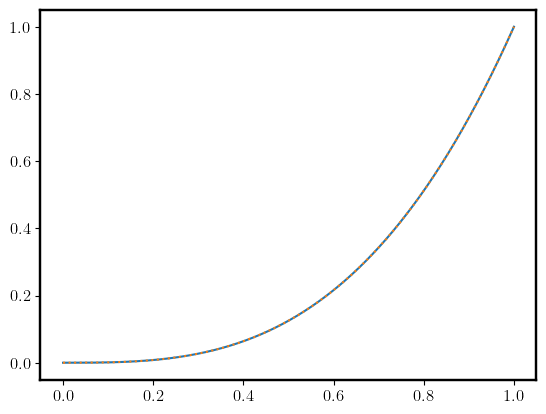

0.14285714410906095


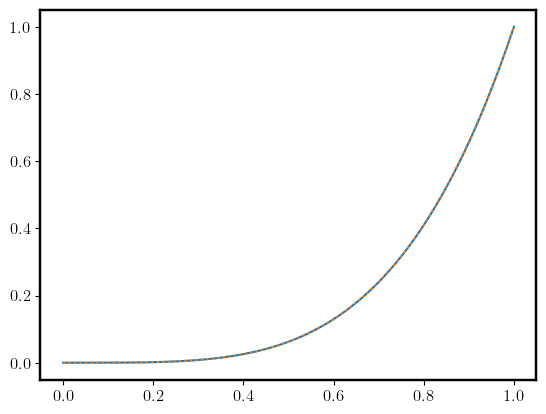

0.1111111134463104


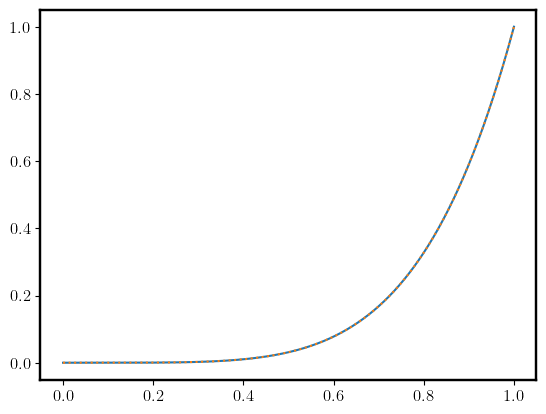

0.0909090946593369


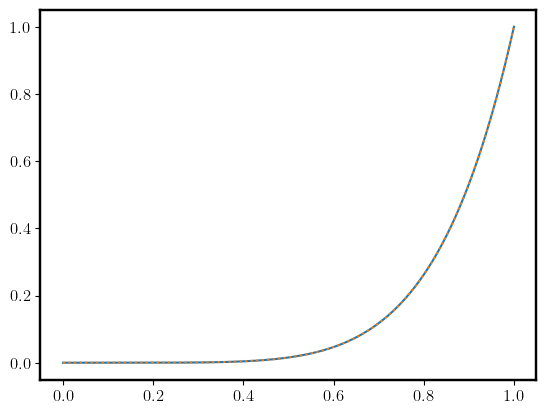

0.07692308341307912


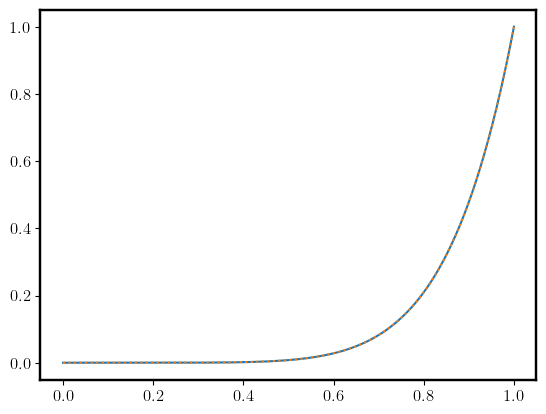

0.0666666742393788


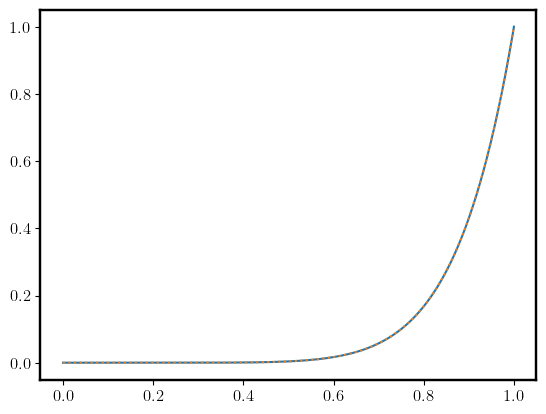

0.058823505487722826


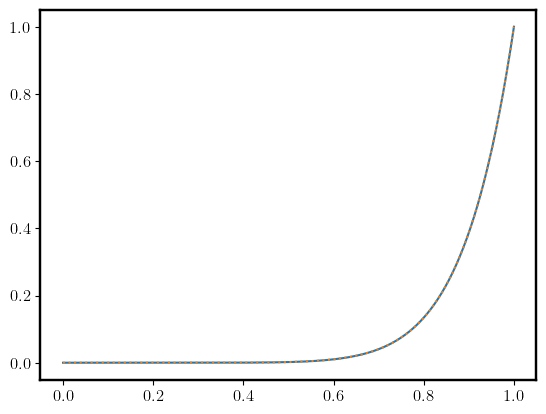

0.05263159166085069


In [131]:
for i in y:
    z = np.dot(B, i[nodes])
    plt.plot(x, i)
    plt.plot(x, z, linestyle='dotted')
    plt.show()
    print(match(z, i, x))


In [15]:
TS_sizes = []
RB_sizes = []
x = np.linspace(0, 1, 100)
for i in np.arange(10, 300, 5):
    funcs = monomial(i, x)
    RB_sizes.append(len(ROM.modified_GS(funcs, x)))
    TS_sizes.append(i)

[ 1.25        1.66666667  2.22222222  2.77777778  3.          3.5
  3.63636364  4.09090909  4.54545455  5.          5.45454545  5.90909091
  5.83333333  6.25        6.66666667  7.08333333  7.5         7.91666667
  8.33333333  8.75        9.16666667  9.58333333  9.23076923  9.61538462
 10.         10.38461538 10.76923077 11.15384615 11.53846154 11.92307692
 12.30769231 12.69230769 13.07692308 13.46153846 13.84615385 14.23076923
 14.61538462 15.         15.38461538 15.76923077 16.15384615 16.53846154
 16.92307692 17.30769231 17.69230769 18.07692308 18.46153846 18.84615385
 19.23076923 19.61538462 20.         20.38461538 20.76923077 21.15384615
 20.         20.35714286 20.71428571 21.07142857]


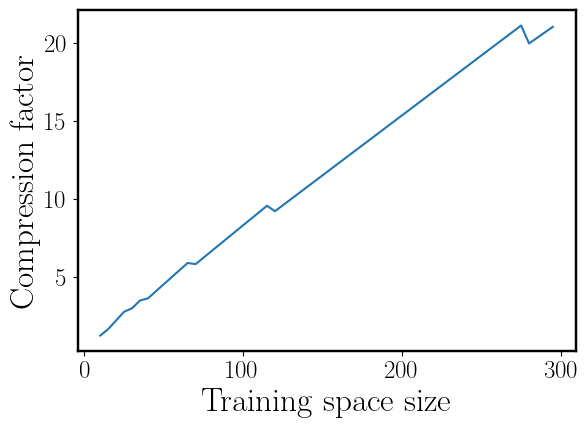

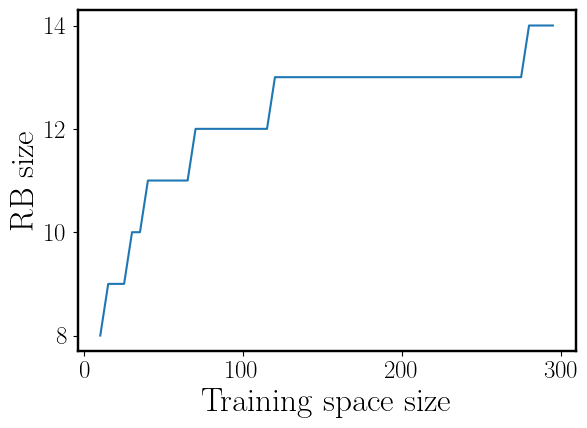

In [19]:
factors = np.asarray(TS_sizes)/np.asarray(RB_sizes)


plt.plot(TS_sizes, factors)
plt.xlabel('Training space size')
plt.ylabel('Compression factor')
plt.tight_layout()
plt.savefig('figures/monomial_rb_factors', dpi=300)
plt.show()

plt.plot(TS_sizes, RB_sizes)
plt.xlabel('Training space size')
plt.ylabel('RB size')
plt.tight_layout()
plt.savefig('figures/RB_convergence', dpi=300)
plt.show()